In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os

/Users/jinxin/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***

# Homework Assignment \#2

*due Thursday, February 22nd at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homework_02.ipynb``` file as a template and write the answers in text and include relevant code below each question. Print this document, double-sided, staple it, and hand it in on Thursday, February 22nd at 12.45pm at the beinning of class.  

### Question 1

Maximum Likelihood Estimation (MLE) and Gradient Descent are two alternatives to Ordinary Least Squares that used to obtain estimates of the regression parameters. In fact, MLE and Gradient Descent are techniques often used in machine learning algorithms. Research and *briefly* discuss, both methods, their merits and their drawbacks. This answer should not exceed a page, and should probably not be shorter than a paragraph. Although the use of some light math is preferred, it is not required.

**Answer:**
1.MLE

Using MLE in linear regression, we assume the errors follow a Gaussian distribution, that is $\epsilon_i$ $\tilde{}$ $N(0, \sigma^2)$.

Under the normal errors assumptions, the joint probability density function (pdf) of $Y_1, Y_2,...,Y_n$ is 

$f(Y_1, Y_2,...,Y_n | \beta_0, \beta_1, \sigma^2)$

$= \Pi_{i = 1}^n f(Y_i | \beta_0, \beta_1, \sigma^2)$

For MLE, we'd like to find a set of $\beta_0$ and $\beta_1$ that maximize the above probability density function. For more detailed mathematical explanation please refer: https://ctu.edu.vn/~dvxe/econometrics/MLE_simple_linear_regression.pdf

`Merits:` since we assume the errors are normally distributed, we can perform hypothesis testing and compute confidence interval for $\beta_0$ and especially, $\beta_1$.

`Drawbacks:` If the errors don't follow a normal distribution, then we'd get different estimation as compared to OLD. The inferences we make about $\beta_0$ and $\beta_1$ would not be reliable. (e.g. we might have a wider confidence interval)

2.Gradient Descent

For GD, we change our perspective from maximizing PDF to minimizing a loss function. In linear regression, we'd like to find a set of $\beta_0$ and $\beta_1$ that minimize the following loss function:

$error = \frac{1}{N} \sum_{i=1}^n(Y_i - (\beta_0 + \beta_1 X_i))^2$ -> this is basically the SSE.

But how do we minimize this loss function: 
- We take partial derivative with respect to $\beta_0$ and $\beta_1$. For $\beta_1$, the partial derivative looks like $- \frac{2}{N} \sum_{i=1}^n X_i (Y_i - (\beta_0 + \beta_1 X_i))$ and this is what we call a gradient. Let's denote it as PD
- We initilize $\beta_1$ with some arbitrary value, e.g. 0 and perform the following update:
$\beta_1 := \beta_1 + \alpha * PD$ (:= means we are updating $\beta_1$, $\alpha$ is a learning rate that controls how fast we want to perform the update). We keep updating $\beta_1$ until its value become stable which means we have found the $\beta_1$ that gives us the minimum loss. We do the same thing to $\beta_0$.

For more detailed explanation please refer: http://cs229.stanford.edu/notes/cs229-notes1.pdf

`Merits:` For large dataset, Gradient Descent can be more computationally efficient than OLS.

`Drawbacks:` However, sometimes if the loss function has multiple local minima. Gradient Descent might not converge to the global minimum. Luckily, the loss function of linear regression is convex, meaning we can always find a global minimum.

### Question 2

Import `pga_data.csv`, data on professional male golfers. Regress `AvgDrive` ($y$), the mean length of a golfer's drive in yards, against `DrvAcc` ($x$), the percentage of times a golfer is able to land their ball on the fairway when driving the ball.

In [2]:
pga = pd.read_csv('pga_data.csv')
pga.head(5)

,First,Last,Age,AvgDrive,DrvAcc,PercGreens,AvgNoPutts,Saveperc,MoneyRank,NoEvents,TotWin,AvgWin
0,Aaron,Baddeley,23,288.0,53.1,58.2,1.767,50.9,123,27,632878,23440
1,Adam,Scott,24,295.4,57.7,65.6,1.757,59.3,7,16,3724984,232812
2,Alex,Cejka,34,285.8,64.2,63.8,1.795,50.7,54,24,1313484,54729
3,Andre,Stolz,34,297.9,59.0,63.0,1.787,47.7,101,20,808373,40419
4,Arjun,Atwal,31,289.4,60.5,62.5,1.766,43.5,146,30,486053,16202


In [3]:
X = sm.add_constant(pga.DrvAcc)
model = sm.OLS(pga.AvgDrive, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgDrive   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           2.07e-21
Time:                        21:18:08   Log-Likelihood:                -646.08
No. Observations:                 196   AIC:                             1296.
Df Residuals:                     194   BIC:                             1303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        348.1576      5.698     61.097      0.0

1.What is the equation of the fitted regression line?

**Answer:** $AvgDrive = 348.1576 - 0.9516 * DrvAcc$ 

2.Compute the sum of the residuals squared, i.e., $\sum e_i^2$

**Answer:** 8374.06

In [4]:
sum((pga.AvgDrive - (348.1576 - 0.9516 * pga.DrvAcc))**2)

8374.056879056001

In [5]:
results.ssr

8374.0563758884091

3.Create four other regression models whereby you come up with your own values for $b_0$ and $b_1$. Compute the sum of squared residuals for each model and fill in the table below. When complete, examine the $\sum e_i^2$ columna and comment on what you have learned/confirmed.

**Answer:** We notice that the OLS gives the smallest $\sum e_i^2$. Other $\beta_0$ and $\beta_1$ regardless how they change, the $\sum e_i^2$ is always much larger.

| Model #1 | $b_0$ | $b_1$ | $\sum e_i^2$ |
|----------|-------|-------|--------------|
|   OLS    |348.16 |-0.9516|   8374       |
|   1      |350    |0.96   |  3059014     |
|   2      |380|-0.98      | 185061       |
|   3      |400    |-1.0   | 474046       |
|   4      |320    |-0.94  |  155659      |

In [6]:
def ssr(b0, b1):
    return sum((pga.AvgDrive - (b0 + b1 * pga.DrvAcc))**2)

print ssr(348.1576, -0.9516)
print ssr(350, 0.96)
print ssr(380, -0.98)
print ssr(400, -1.0)
print ssr(320, -0.94)

8374.05687906
3059014.08744
185061.07476
474046.93
155659.47524


### Question 3

Import `platsicHardness.txt`. The first column of data represents plastic hardness in Brinell units ($y$) and the second column data represents the number of hours elapsed since the plastic was molded ($x$). Run a SLR model along with all relevant diagnostics---do not include numerical/graphical output, just a basic summary, written or tabular, of what you found. Succinctly discuss what you observe. Do you observe any issues with the model?

Run a Brown-Forsythe test to determine whether or not the error variances varies with the level of $x$. Divide the data into two groups, $x \leq 24$ and $x > 24$, and use $\alpha = 0.05$. State the hypothesis test, decision rule, and the conclusion. Discuss this result in context of what you discovered earlier. 

In [7]:
plastic = pd.read_table('plasticHardness.txt', names=['brinell', 'hour'], skipinitialspace=True, sep=' ')
print plastic.shape

(16, 2)


In [8]:
X = sm.add_constant(plastic.hour)
model = sm.OLS(plastic.brinell, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                brinell   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           2.16e-12
Time:                        21:18:08   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.6000      2.657     63.454      0.0

/Users/jinxin/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


**Answer: ** First, let's check if the mean of the erros is zero. Given the result below, we can see the mean is very close to zero. so the mean zero assumption is met.

In [9]:
sum(results.resid) / len(plastic)

-4.263256414560601e-14

Next, let's check for homoscedasticity. When running a regression of $residual^2$ on $hour$, we got a $\beta_{hour}$ of -0.2277 with a p-value of 0.402. We fail to reject that $\beta_{hour}$ is statistically different from 0. So there doesn't seem to be a heteroscedasticity problem.

In [10]:
X2 = sm.add_constant(plastic.hour)
model2 = sm.OLS(results.resid**2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.7483
Date:                Thu, 01 Mar 2018   Prob (F-statistic):              0.402
Time:                        21:18:08   Log-Likelihood:                -57.518
No. Observations:                  16   AIC:                             119.0
Df Residuals:                      14   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5281      7.738      2.007      0.0

Finally, let's run Brown-Forsythe test to check for homoscedasticity.

$H_0: \sigma^2_{hour <= 24} = \sigma^2_{hour > 24}$

$H_1: \sigma^2_{hour <= 24} \neq \sigma^2_{hour > 24}$

We got a p-value of 0.40 which is greater than 0.05 or the 5% significance level. We don't have enough evidence to reject the null hypothesis. Given the data we have, we can conclude that variance of errors is constant.

In [11]:
import scipy as sp
sample_1 = results.resid[plastic.hour <= 24]
sample_2 = results.resid[plastic.hour > 24]
sp.stats.levene(sample_1, sample_2, center = 'median')

LeveneResult(statistic=0.73236854364846271, pvalue=0.40652533559298387)

### Question 4

Import `copierMaintenanceData.csv`. Column 1 is $y$ and column 2 is $x$.

$x$ are the number of photocopiers serviced by a service company at a given location, and $y$ are the total number of minutes spent by the service person. 

In [12]:
copier = pd.read_csv('copierMaintenanceData.csv', names=['y', 'x'])
copier.head(5)

,y,x
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1


Answer the following questions.

1.Obtain the OLS estimates of the parameters. Please see the output below.

In [13]:
X = sm.add_constant(copier.x)
model = sm.OLS(copier.y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     968.7
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           4.01e-31
Time:                        21:18:09   Log-Likelihood:                -161.27
No. Observations:                  45   AIC:                             326.5
Df Residuals:                      43   BIC:                             330.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5802      2.804     -0.207      0.8

2.Write out the fitted regression equation.

**Answer:** $y = -0.5802 + 15.0352 * x$ 

3.What is the numerical value of $\sum e_i^2$? Please see the output below.

In [14]:
sum(results.resid**2)

3416.3770234986932

4.Does $b_0$ provide any relevant information in this context?

**Answer: ** $b_0$ usually serves as a baseline for y, meaning when the value of x is 0, what is the value of y. In the context of this problem, we can say when the number of photocopiers serviced by a company is 0, the total number of minutes spent by the service person is -0.5802. Therefore, $b_0$ doesn't really provide relevant information here.

5.Obtain a point estimate of the mean service time when 5 copiers are serviced.

**Answer:** 74.5958.

6.Compute the confidence and prediction intervals when 5 copiers are serviced.

In [15]:
model = smf.ols('y ~ x', data = copier).fit()
model.get_prediction({'x':[5]}).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,74.596084,1.329831,71.914224,77.277943,56.421325,92.770842


7.Test the hypothesis that $H_0: \beta_1 = 0$ using a $t$ test. Show all work.

**Answer:** **Answer:** 
$H_0: \beta_1 = 0 \\
H_1: \beta_1 \neq 0$

The critical value for a t-test is computed using $t-score = \frac{b_1 - \beta_1}{s(b_1)} ~~ \tilde{} ~~ t_(n - 2)$ (the degrees of freedom is n - 2). 

For $\alpha =  0.05$, we do the following:

In [16]:
from scipy import stats
t_crit = stats.t.isf(.025, len(copier) - 2)
t_star = 15.0352 / 0.483
print t_crit, t_star

2.01669219414 31.1287784679


From the test result above, we see that 31.128 > 2.016 which is the critical value at the 5% significance level. We have enough evidence to reject the $H_0: \beta_1 = 0$ and accept $H_1$.

### Question 5

1.Create a vector of 10,000,000 random variables $\sim \mathcal{U}\{0,1\}$ and store them in the list called `myRndUnif`. Randomly sample 100,000 values `myRndUnif` from this vector and create a histogram from the sample. What is the distribution of the sample (visually)? Repeat this exercise a few more times, if necessary, to convince yourself that when randomly sampling from a $\mathcal{U}\{a,b\}$ distribution, the sample is also $\sim \mathcal{U}\{a,b\}$.

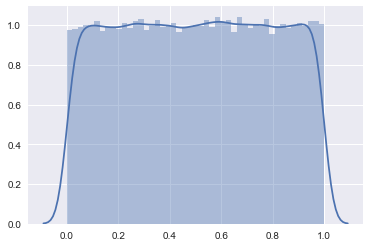

In [17]:
myRndUnif = np.random.uniform(size=10000000)
myRndSample = np.random.choice(myRndUnif, 100000)
sns.distplot(myRndSample)

2.Randomly sample 100,000 **pairs** of values (groups of 2), and create a histogram of the mean of these samples. What does the distribution look like?

**Answer:** The distribution is normal. You might want to write a for loop that randomly takes 2 samples 100,000 times. It's actually equivalent to randomly taking 100,000 samples twice, then make the pairs.

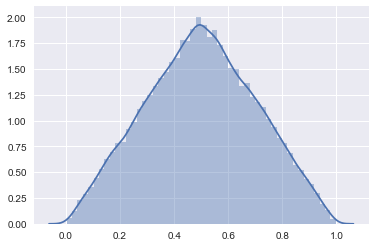

In [18]:
myRndSample1 = np.random.choice(myRndUnif, 100000)
myRndSample2 = np.random.choice(myRndUnif, 100000)
avg = (myRndSample1 + myRndSample2) / 2
sns.distplot(avg)

3.Randomly sample 100,000 **groups of five values**, and create a histogram of the mean of these samples. What does the distribution look like?

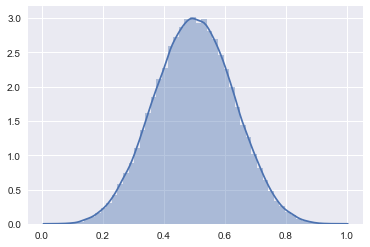

In [19]:
def hist_from_random_samples(ls, sample_size=100000, iteration=5):
    sum_list = np.zeros(sample_size)
    for i in range(iteration):
        sum_list += np.random.choice(ls, 100000)
    avg_list = sum_list / iteration
    sns.distplot(avg_list)

hist_from_random_samples(myRndUnif)

4.Randomly sample 100,000 **groups of ten values**, and create a histogram of the mean of these samples. What does the distribution look like?

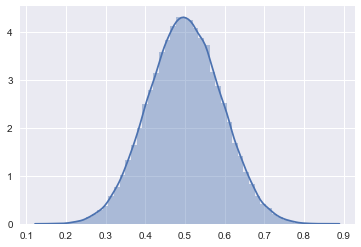

In [20]:
hist_from_random_samples(myRndUnif, iteration=10)

5.Randomly sample 100,000 **groups of thirty values**, and create a histogram of the mean of these samples. What does the distribution look like?

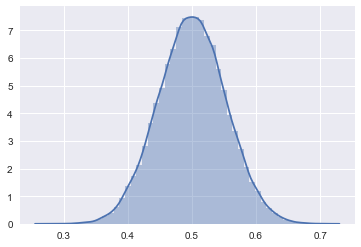

In [21]:
hist_from_random_samples(myRndUnif, iteration=30)

6.Repeat steps 1 through 5 using an **exponential distribution**.

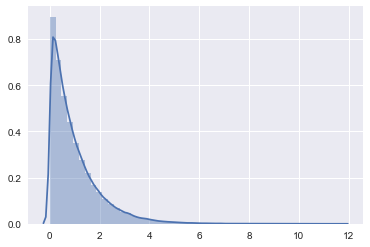

In [22]:
myRndExp = np.random.exponential(size=10000000)
myRndSample = np.random.choice(myRndExp, 100000)
sns.distplot(myRndSample)

**Summary:** As sample size gets from 2 to 30, the mean distribution tend to become normal.

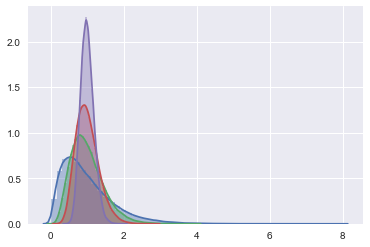

In [23]:
for i in [2, 5, 10, 30]:
    hist_from_random_samples(myRndExp, iteration=i)

### Question 6

You compute a coefficient of determination for a regression model an obtain an $R^2=0.832$. What does the strength of the coefficient of determination say about the causal relationship between the explanatory and response variables?

**Answer: ** $R^2$ = 0.832 means 83.2% of the variation of the response variable can be explain by the independent variables. While it indicates that there is a strong strength of the relationship between the explanatory and responsib variables, it doesn't imply any causal relationship between the two.

### Question 7

When testing for the normality of residuals, I suggested you use a normality test such as the Shapiro-Wilk test. 

1. Read the entry at the following link: https://www.r-bloggers.com/normality-tests-don%E2%80%99t-do-what-you-think-they-do/

2. Generate 10,000 standard normal random variates, and run a Shapiro-Wilk test on them to test for normality, using the Shapiro Wilk test in in the `SciPy` package. Why does this fail? What internal limitations are included in `scipy.stats.shipro()` to ensure that the problems described in the URL above don't occur?

**Answer:** The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. Given the test result from Scipy, we don't have enough evidence to conclude that the sample data is normally distributed. Based on the scipy.stats.shapiro() documentation, for N > 5000 the W test statistic is accurate but the p-value may not be.

To ensure that the problems described in the URL above don't occur, we can usually use histogram and QQ-plot to get a good sense of whether the data are normally distributed.

In [24]:
import scipy
myRndNormal = np.random.normal(size=10000)
scipy.stats.shapiro(myRndNormal)

/Users/jinxin/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9997791647911072, 0.3998078405857086)

### Question 8

Import `pga_data.csv`, data on professional male golfers. Regress `AvgDrive` ($y$), the mean length of a golfer's drive in yards, against `DrvAcc` ($x$), the percentage of times a golfer is able to land their ball on the fairway when driving the ball. Manually code up a numerical Box-Cox search procedure for $\lambda \in [-5, 5]$ in increments of 0.1 to find the $\lambda$ that minimizes SSE for this model. Create a graph with $\lambda$ on the $x$-axis and $SSE_{\lambda}$ on the $y$-axis. Report the $\lambda$ that minimizes SSE for this model.

In [25]:
X = sm.add_constant(pga.DrvAcc)
model = sm.OLS(pga.AvgDrive, X)
results = model.fit()
sse = results.ssr
min_lambda = -6

for lambda_ in np.arange(-5, 5.01, 0.01):
    k2 = np.prod(np.power(pga.AvgDrive, 1.0 / len(pga.AvgDrive)))
    k1 = 1 / (lambda_ * np.power(k2, lambda_ - 1))
    X = sm.add_constant(pga.DrvAcc)
    
    if lambda_ != 0:       
        model = sm.OLS(k1 * (np.power(pga.AvgDrive, lambda_) - 1), X)
    else:
        model = sm.OLS(k2 * np.log(newdata['AvgDrive']), X)
        
    results = model.fit()
    if results.ssr < sse:
        sse = results.ssr
        min_lambda = lambda_
        
print("The lambda that minimizes SSE is %f" % min_lambda)

The lambda that minimizes SSE is -2.050000


In [26]:
X = sm.add_constant(pga.DrvAcc)
model = sm.OLS(pga.AvgDrive**(-2.05), X)
results = model.fit()
print(results.ssr)

3.52279339547e-11
